![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Estudiante: Vicente Bórquez Zapata

**Link a Github:**


---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


### 1. Introducción

Dados los datos de clientes de un banco, se busca predecir si un cliente pagará o no un préstamo recibido. Los datos de los clientes contiene muchos parámetros relacionados con su información crediticia específica y bancaria básica. 

Sabemos que en la columna sobre la cual se quiere realizar la clasificación (``credit_score``), clase 0 signifca que se trata de un cliente no riesgoso para dar crédito y clase 1 significa que se tiene alto riesgo. Definitivamente, el error más importante a minimizar es aquel en el que clientes de alto riesgo (1) sean clasificados como bajo riesgo (0), ya que este sería el tipo de errores que más dinero le podrían costar al banco. Así, el error que se quiere minimizar son los falsos negativos. Justamente por lo anterior, es que la métrica a usar será **recall** sobre la **clase 1**.

El modelo final utilizado es el `XGBoost`, el resultado final fue de 0.61 en la métrica escogida, por lo que se considera que si se logró resolver el problema. Las transformaciones a los datos consistieron en: 1) Generar datos para completar valores nulos, 2) Aplicar One Hot Encoding para variables categóricas y aplicar estandarizaciones para valores numéricos.

### 2. Carga de datos Análisis Exploratorio de Datos

La carga de los datos se hace en la función `get_data` usada en el nodo `get_data_node` del pipeline `data_prep` de Kedros. Se cuenta con el EDA desde un inicio en el archivo `profile.html`

In [1]:
import pandas as pd

df = pd.read_parquet("data/dataset.pq")

In [2]:
df

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0x372c,19.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,9,...,1.0,1079.48,35.716618,28.0,No,34.975457,115.184984,High_spent_Medium_value_payments,NaN,0
12496,CUS_0xf16,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,...,8.0,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0
12497,CUS_0xaf61,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,...,3.0,620.64,39.300980,30.0,No,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0
12498,CUS_0x8600,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,...,9.0,3571.70,37.140784,6.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,NaN,0


In [3]:
# # las siguientes líneas cargan el EDA, por temas de formato con vscode 
# # están comentadas. El archivo "profile.html" contiene todo el EDA relevante. 
# from IPython.display import HTML
# HTML('profile.html')

Se hace un plot de la columna ``monthly_balance`` ignorando los valores menores a 0, esto será útil en la siguiente sección.

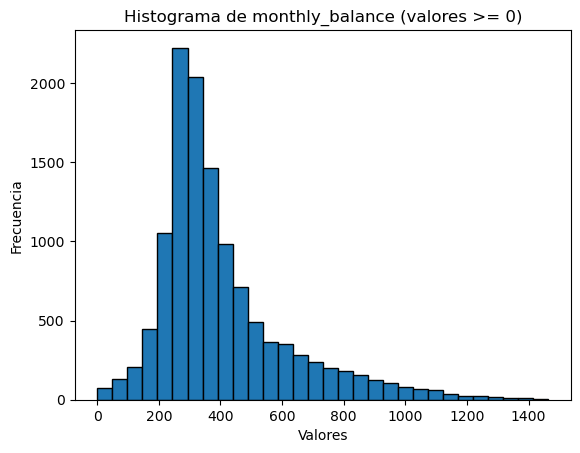

In [4]:
import matplotlib.pyplot as plt

filtered_data = df[df['monthly_balance'] >= 0]['monthly_balance']


plt.hist(filtered_data, bins=30, edgecolor='black')  
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de monthly_balance (valores >= 0)')
plt.show()

In [5]:
# Valores nulos:
    
print(df.isnull().any(axis=1).sum()/len(df))
df.isnull().sum()

0.36112


customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

### 3. Preparación de Datos

#### Manejo de valores nulos:

La solución más fácil sería eliminar todos los valores nulos, el problema de hacer esto esto es que se estaría eliminando el 36% de los datos originales. Considerando el obvio problema de hacer esto, se buscará otra forma de solucionar esto: **Completar los valores faltantes**.

Se tienen 7 columnas con datos faltantes. Estas columnas, junto con sus técnicas para generar los valores faltantes son:

1. ``monthly_inhand_salary``: 

Es el salario base mensual del cliente. 10579 valores distintos.
        
Según el gráfico observado en el EDA, se considera que esta columna sigue una distribución de Poisson. Por ello, para generar los datos se generará un número aleatorio que sigua la distribución de poisson estimada. Para escoger el lambda de esta distribución, se calcula el estimador de máxima verosimilitud de este parámetro como  $\hat{\lambda}_n = \frac{1}{n}\sum_{j=1}^{n}x_j$ sobre los datos conocidos. 

2. ``num_of_delayed_payment``: 

El promedio de pagos atrasados del cliente. 129 valores distintos.

Se escogerá de manera aletoria alguno de los valores distintos que si ocurren. Cada número tebndrá una probabilidad de ser escogido proporcional a la cantidad de veces que dicho valor efectivamente ocurre entre los datos conocidos. Así, si un número X ocurre 10 veces más que Y, la probabilidad de escoger X será 10 veces la probabilidad de escoger Y. Esto último compensará razonablemente bien cualquier presencia de outliers entre los datos conocidos.

3. ``changed_credit_limit``: 

El cambio porcentual en el límite de la tarjeta de crédito. 2985 valores distintos.

Según el gráfico observado en el EDA, se considera que esta columna sigue una distribución normal. Por lo mismo, se generarán los valores faltantes según la media y la desviación estándar de los datos conocidos de esta columna.

4. ``num_credit_inquiries``: 

La cantidad de consultas de tarjetas de crédito. 201 valores distintos.

Se aplica la misma estrategia que para `num_of_delayed_payment`.

5. ``credit_history_age``: 

La edad del historial crediticio del cliente. 34 valores distintos.

Se aplica la misma estrategia que para `num_of_delayed_payment`.


6. ``amount_invested_monthly``: 

La cantidad (en USD) invertida mensualmente del cliente. 10579 valores distintos.

Observando el gráfico del EDA, se asume que esta columna sigue una distribución geométrica. Además se trabaja con el supuesto de que hay una concentración en el valor máximo $10000$ de 500 ocurrencias (4% del dataset), solamente porque se trata de casos que mensualmente invertían cantidades superiores a $1000 USD$, pero que el banco decidió registrar estos casos como $10000$ en el dataset para poder observar, graficar y almacenar de mejor manera estos casos.

El parámetro de probabilidad utilizado para la distribución geométrica asumida, se calculará de acuerdo a su estimador de máxima verosimilitud: $\hat{p} = \frac{1}{X}$, donde $X$ es el máximo valor de los datos conocidos.

7. ``monthly_balance``: 

El balance mensual del cliente (en USD). 12145 valores distintos.

Ignorando el único valor menor a 0 en esta columna, se considera que los datos siguen una distribución de Poisson, por lo que, ignorando el caso en el que esta columna vale $-3.3e^26$, para completar los datos faltantes se seguirá la misma estrategia que en ``monthly_inhand_salary``. Además, como se considera un error el caso extremo mencionado, se asumirá que es un error y se lo tratará del mismo modo que a los valores faltantes (su valor será cambiado por uno obtenido de la distribución de Poisson obtenida).


Antes de obtener los parámetros necesarios para completar los datos faltantes (probabilidades, cantidades y lambdas) se dividirá el dataset en dos distintos según el valor que se tenga en ``credit_score`` y se obtendrá cada parámetro para los casos en los que ocurre y no ocurre fraude. Esto porque es posible que se sigan distribuciones distintas dependiendo de si se trata o no de un caso de fraude y como se quiere clasificar sobre esta columna, no es buena idea generar datos para una clase utilizando información de la otra.

In [6]:
# División dataset:
df_cs0 = df[df['credit_score'] == 0]
df_cs1 = df[df['credit_score'] == 1]

# Se realiza de inmediato el reemplazo por NaN mencionado en el punto 7 anterior:
cond = df_cs1['monthly_balance'] < 0
df_cs1.loc[ cond, 'monthly_balance'] = pd.NA

# Cálculo lambdas Poisson monthly_inhand_salary y monthly_balance
lambda_mis_cs0 = df_cs0["monthly_inhand_salary"].sum()/df_cs0["monthly_inhand_salary"].count()
lambda_mis_cs1 = df_cs1["monthly_inhand_salary"].sum()/df_cs1["monthly_inhand_salary"].count()

lambda_mb_cs0 = df_cs0["monthly_balance"].sum()/df_cs0["monthly_balance"].count()
lambda_mb_cs1 = df_cs1["monthly_balance"].sum()/df_cs1["monthly_balance"].count()

print("lambdas monthly_inhand_salary : ")
print(f"cred_score = 0 : {lambda_mis_cs0}")
print(f"cred_score = 1: {lambda_mis_cs1}")

print("\nlambdas monthly_balance : ")
print(f"cred_score = 0 : {lambda_mb_cs0}")
print(f"cred_score = 1 : {lambda_mb_cs1}")

# Cálculo probabilidades valores num_of_delayed_payment, num_credit_inquiries y
#  credit_history_age

vf_ndp_cso = df_cs0["num_of_delayed_payment"].value_counts().to_dict()
for val in vf_ndp_cso:
    vf_ndp_cso[val] = round(vf_ndp_cso[val]/df_cs0["num_of_delayed_payment"].count(), 6)

vf_ndp_cs1 = df_cs1["num_of_delayed_payment"].value_counts().to_dict()
for val in vf_ndp_cs1:
    vf_ndp_cs1[val] = round(vf_ndp_cs1[val]/df_cs1["num_of_delayed_payment"].count(), 6)

vf_nci_cso = df_cs0["num_credit_inquiries"].value_counts().to_dict()
for val in vf_nci_cso:
    vf_nci_cso[val] = round(vf_nci_cso[val]/df_cs0["num_credit_inquiries"].count(), 6)

vf_nci_cs1 = df_cs1["num_credit_inquiries"].value_counts().to_dict()
for val in vf_nci_cs1:
    vf_nci_cs1[val] = round(vf_nci_cs1[val]/df_cs1["num_credit_inquiries"].count(), 6)

vf_cha_cso = df_cs0["credit_history_age"].value_counts().to_dict()
for val in vf_cha_cso:
    vf_cha_cso[val] = round(vf_cha_cso[val]/df_cs0["credit_history_age"].count(), 6)

vf_cha_cs1 = df_cs1["credit_history_age"].value_counts().to_dict()
for val in vf_cha_cs1:
    vf_cha_cs1[val] = round(vf_cha_cs1[val]/df_cs1["credit_history_age"].count(), 6)

# Cálculo de media y desviación estándar para distribución normal de changed_credit_limit

mean_ccl_cs0 = df_cs0['changed_credit_limit'].mean()
std_ccl_cs0 = df_cs0['changed_credit_limit'].std()

mean_ccl_cs1 = df_cs1['changed_credit_limit'].mean()
std_ccl_cs1 = df_cs1['changed_credit_limit'].std()

print("\nMedias changed_credit_limit : ")
print(f"cred_score = 0 : {mean_ccl_cs0}")
print(f"cred_score = 1: {mean_ccl_cs1}")

print("\nDesv. Estándar changed_credit_limit : ")
print(f"cred_score = 0 : {std_ccl_cs0}")
print(f"cred_score = 1 : {std_ccl_cs1}\n")


# Cálculo probabilidad distyribución geométrica amount_invested_monthly:
print(max(df_cs1['amount_invested_monthly']) == max(df_cs0['amount_invested_monthly']))

# Como ambos casos tienen el mismo valor máximo, para ambos aplica la misma probabilidad
# p de la distribución:

p_Geom_dist = 1/max(df_cs1['amount_invested_monthly'])
print(p_Geom_dist)

lambdas monthly_inhand_salary : 
cred_score = 0 : 4483.961410863733
cred_score = 1: 3450.1561801300845

lambdas monthly_balance : 
cred_score = 0 : 422.7758499982085
cred_score = 1 : 354.45216266527297

Medias changed_credit_limit : 
cred_score = 0 : 10.112147028512538
cred_score = 1: 11.110634785083974

Desv. Estándar changed_credit_limit : 
cred_score = 0 : 6.6228638250717164
cred_score = 1 : 7.170652701164274

True
0.0001


#### Split Data

La división de datos se hace en la función `split_data` en el nodo `split_data_node` del pipeline `data_prep` de Kedros. Las proporciones son 80% entrenamiento, 10% validación y 10% testeo. Esto se puede modificar en los parámetros del pipeline.

#### Col Transformer

Observados el EDA en general y los histogramas de las variables en particvular, las columnas se dividieron en 4 conjuntos:

1. Variables numéricas con valoresd extremos: "age", "annual_income", "num_bank_accounts", "num_credit_card", "interest_rate", "num_of_loan", "num_of_delayed_payment", "num_credit_inquiries", "total_emi_per_month", "amount_invested_monthly" y "monthly_balance". A estas variables, por tener outliers tan marcados, se les aplica una estandarización robusta a estos casos: `RobustScaler`.

2. Otras variables numéricas: "monthly_inhand_salary", "delay_from_due_date", "changed_credit_limit", "outstanding_debt", "credit_utilization_ratio" y "credit_history_age". A estas variables se les aplica la estandarización estándar: `StandardScaler`.

3. Variables categóricas: "occupation", "payment_of_min_amount" y "payment_behaviour". A todas estas variables se les aplica `One Hot Encoding`. 


Todo este preprocesamiento se encuentra en el `ColumnTransformer` retornado por la función del nodo `get_column_transformer` del pipeline `data_prep`. Notar que este `ColumnTransformer` es creado, pero aun no se utiliza (esto se hará en el siguiente pipeline).


#### Unificación en el pipeline

Esta es la visualización del pipeline hasta ahora:

<img src="./proyecto2/assets/data_prep_pipeline.PNG"/>

### 4. Baseline

Los modelos son creados, implementados en pipelines (de sklearn), ajustados y retornados por la función `create_and_fit_pipelines` del pipeline (de Kedros) `baseline_classifier`. Luego de ser evaluados (con datos de validación) en el nodo `eval_pipelines` del mismo pipeline, se tienen los reports de los baselines en ``/data/08_reporting``:

In [7]:
Dummy_BReport = pd.read_parquet("proyecto2/data/08_reporting/Dummy_Pipe_B_Report.parquet")
LogReg_BReport = pd.read_parquet("proyecto2/data/08_reporting/LR_Pipe_B_Report.parquet")
KNN_BReport = pd.read_parquet("proyecto2/data/08_reporting/KNN_Pipe_B_Report.parquet")
DecTree_BReport = pd.read_parquet("proyecto2/data/08_reporting/DT_Pipe_B_Report.parquet")
SVC_BReport = pd.read_parquet("proyecto2/data/08_reporting/SVC_Pipe_B_Report.parquet")
RandF_BReport = pd.read_parquet("proyecto2/data/08_reporting/RF_Pipe_B_Report.parquet")
LGBM_BReport = pd.read_parquet("proyecto2/data/08_reporting/LGBM_Pipe_B_Report.parquet")
XGB_Report = pd.read_parquet("proyecto2/data/08_reporting/XGB_Pipe_B_Report.parquet")
Recalls_C1 = pd.read_parquet("proyecto2/data/08_reporting/recalls_class1.parquet")

In [8]:
Dummy_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.694537,0.294618,0.5816,0.494577,0.573602
recall,0.714450,0.275132,0.5816,0.494791,0.581600
f1-score,0.704353,0.284542,0.5816,0.494447,0.577402
support,872.000000,378.000000,0.5816,1250.000000,1250.000000


In [9]:
LogReg_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.765326,0.645631,0.7456,0.705478,0.729130
recall,0.916284,0.351852,0.7456,0.634068,0.745600
f1-score,0.834029,0.455479,0.7456,0.644754,0.719556
support,872.000000,378.000000,0.7456,1250.000000,1250.000000


In [10]:
KNN_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.787190,0.609929,0.7472,0.698560,0.733586
recall,0.873853,0.455026,0.7472,0.664440,0.747200
f1-score,0.828261,0.521212,0.7472,0.674736,0.735409
support,872.000000,378.000000,0.7472,1250.000000,1250.000000


In [11]:
DecTree_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.807778,0.585714,0.7456,0.696746,0.740626
recall,0.833716,0.542328,0.7456,0.688022,0.745600
f1-score,0.820542,0.563187,0.7456,0.691864,0.742718
support,872.000000,378.000000,0.7456,1250.000000,1250.000000


In [12]:
SVC_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.698159,1.000000,0.6984,0.849079,0.789435
recall,1.000000,0.002646,0.6984,0.501323,0.698400
f1-score,0.822254,0.005277,0.6984,0.413765,0.575200
support,872.000000,378.000000,0.6984,1250.000000,1250.000000


In [13]:
RandF_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.827375,0.771218,0.8152,0.799296,0.810393
recall,0.928899,0.552910,0.8152,0.740905,0.815200
f1-score,0.875203,0.644068,0.8152,0.759635,0.805307
support,872.000000,378.000000,0.8152,1250.000000,1250.000000


In [14]:
LGBM_BReport

,0,1,accuracy,macro avg,weighted avg
precision,0.835052,0.778571,0.8224,0.806811,0.817972
recall,0.928899,0.576720,0.8224,0.752809,0.822400
f1-score,0.879479,0.662614,0.8224,0.771046,0.813899
support,872.000000,378.000000,0.8224,1250.000000,1250.000000


In [15]:
XGB_Report

,0,1,accuracy,macro avg,weighted avg
precision,0.847440,0.791809,0.8344,0.819624,0.830617
recall,0.930046,0.613757,0.8344,0.771901,0.834400
f1-score,0.886823,0.691505,0.8344,0.789164,0.827759
support,872.000000,378.000000,0.8344,1250.000000,1250.000000


- ¿Hay algún clasificador entrenado mejor que el azar (`Dummy`)?

`Dummy` tiene un recall en clase 1 inferior a 0.3. Con excepción de `SVC`, todos los modelos se desempeñan mejor que el clasificador aleatorio.

- ¿Cuál es el mejor clasificador entrenado?

Hasta ahora, el mejor clasificador entrenado es `XGBoost_Baseline` con un recall de la clase 1 aproximado de 0.61.

In [16]:
# Las recalls de la clase 1 ordenadas:

Recalls_C1

,Model_Name,Recall_C_1
0,XGBoost_Baseline,0.613757
1,Light_GBM_Baseline,0.576720
2,Random_Forest_Baseline,0.552910
3,Decision_Tree_Baseline,0.542328
4,K_Neighbors_Baseline,0.455026
5,Logistic_Regression_Baseline,0.351852
6,Dummy_Baseline,0.275132
7,Support_Vector_C_Baseline,0.002646


#### Unificación en el pipeline

Esta es la visualización del pipeline `baseline_classifier`:

<img src="./proyecto2/assets/baseline_classifier_pipeline.PNG"/>

### 5. Optimización del Modelo 

Habiéndose esogido los mejores dos modelos (`XGBoost` y `Light_GBM`), se instancian sus respectivos pipelines, se optimizan sus parámetros con `GridSearchCV` y se evalúan (en valiudación) en la función `optim_best_models`. Finalmente se escoge al mejor de estos modelos (`XGBoost`) y en la función `evaluate_pipe` se evalúa en los datos de prueba. Ambas funciones mencionadas pertenecen al pipeline `models_optim` de Kedros.

In [17]:
# Los reports de clasificación de los modelos optimizados:

reportXGB = pd.read_parquet("proyecto2/data/08_reporting/reportXGB.parquet")
reportLGBM = pd.read_parquet("proyecto2/data/08_reporting/reportLGBM.parquet")

In [18]:
reportXGB

,0,1,accuracy,macro avg,weighted avg
precision,0.847440,0.791809,0.8344,0.819624,0.830617
recall,0.930046,0.613757,0.8344,0.771901,0.834400
f1-score,0.886823,0.691505,0.8344,0.789164,0.827759
support,872.000000,378.000000,0.8344,1250.000000,1250.000000


In [19]:
reportLGBM

,0,1,accuracy,macro avg,weighted avg
precision,0.840249,0.783217,0.8272,0.811733,0.823002
recall,0.928899,0.592593,0.8272,0.760746,0.827200
f1-score,0.882353,0.674699,0.8272,0.778526,0.819558
support,872.000000,378.000000,0.8272,1250.000000,1250.000000


No hubo cambios en la métrica de XGBoost. LightGBMClassifier por otro lado si mejoró la métrica en 0.02 aproximadamente, XGBoost sigue siendo el mejor clasificador, por lo que será usado para la clasificación sobre los datos de prueba.

In [20]:
# El report del mejor modelo sobre los datos de test:

reportXGB_Test = pd.read_parquet("proyecto2/data/08_reporting/XGB_report_Test.parquet")
reportXGB_Test

,0,1,accuracy,macro avg,weighted avg
precision,0.841942,0.719858,0.8144,0.780900,0.807173
recall,0.911633,0.570225,0.8144,0.740929,0.814400
f1-score,0.875403,0.636364,0.8144,0.755883,0.807324
support,894.000000,356.000000,0.8144,1250.000000,1250.000000


En test, se obtuvo un **recall** en **clase 1** de 0.57.


#### Unificación en el pipeline

Esta es la visualización del pipeline `models_optim`:

<img src="./proyecto2/assets/models_optim_pipeline.PNG"/>

### 7. Conclusión


El problema se pudo resolver exitosamente, en cuanto se considere que se buscaba implementar un sistema entendible y fluido para procesar datos y luego ajustar modelos capaces de resolver una predicción que se desempeñaran de manera sustancialmente mejor que una clasificación aleatoria. Justamente por lo anterior es que se considera que estos resultados son aceptables, pues más que se duplicó la métrica (**recall de clase 1**) con respecto a **Dummy** alcanzando un (a juicio del autor) más que aceptable 0.57 en datos de test. Otras métricas (sobre el mismo dataset de prueba): **Recall clase 0**: 0.911633, **Accuracy**: 0.8144, 	**Recall macro avg**: 0.740929	 y **Recall weighted avg**: 0.814400.

En la optimización, se mejoró el segundo mejor modelo (`LightGBMClassifier`) de 0.57 a 0.59 en la métrica relevante, pero no el primero (``XGBoost``) con respecto a sus casos base. Muy probablemente si se hubiesen hecho otros experimentos y se hubiesen variado otros parámetros, esto habría sido distinto. 

**Nota Personal**: Me considero muy conforme con la estructura general del proyecto que logré. Me habría gustado realizar más experimentos y variaciones, por ejemplo: eliminando nulos en lugar de generar datos. Aplicar una transformación logarítmica y luego ona estandarización estándar sobre los datos con outliers, probar *Feature Engineering* y muchas otras cosas más (como interpretabilidad). Algo que cambiaría sería la estructura de los pipelines `baseline_classifier` y `models_optim` unificándolos en un único pípeline (principalmente porque considero que hay redundancia entre ellos). El principal motivo para utilizar 3 pipelines en lugar de dos fue para facilitar la conexión entre las secciones de código y las pedidas en el informe.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>